## This Execrcise is to do the Hands-on with the Structured Data Pre-processing

### One can find the detailed blog on these methods here: [Structured Data Preprocessing in ML](https://www.enjoyalgorithms.com/blog/data-pre-processing-for-machine-learning/)

# Feature Selection Methods: Wrapper Method, Filtering Method and Embedded Method

Let's first take a dummy dataset to perform pre-processing steps. And for that, let's first import the basic libraries.

In [1]:
import pandas as pd
import numpy as np

Here, we will be applying the feature selection method to filter out the important features out of all available features. The first method for this task would be to apply, Sequential Feature Selection, where we will be training the same ML model (for example Linear Regression), on different features and check which combinataion of features are providing best results.

In [7]:
### Python's mlxtend library provides a direct function for feature selection, which is SequentialFeatureSelector

from mlxtend.feature_selection import SequentialFeatureSelector

### We will be using Linear Regression model to train on multiple combination of features.
from sklearn.linear_model import LinearRegression

Let's use the Boston House Price Prediction Dataset and process it further to make it suitable for ML models.

In [8]:
boston_house_price = pd.read_csv("Boston.csv")
boston_house_price.head(5)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Let's mention that which are the actual features and which is the target column in the Boston dataframe.

In [9]:
features = boston_house_price.iloc[:,:13]
target = boston_house_price.iloc[:,-1]

Now, let's define how many features we want in the final dataset, the "k_features" keyword argumewnt in the SequentialFeatureSelector function. Also, select R^2 as the scoring criteria for Linear Regression model. Better R^2 score ensures better model. And we, have already stated that the model we are going to use is Linear Regression.

In [10]:
### Creating the model with the required arguments of model and final number of features.

SFS = SequentialFeatureSelector(LinearRegression(),
                                k_features=4,
                                forward=False,
                                floating=False,
                                scoring = 'r2',
                                cv = 0)

### Let's fit the above model on the features and target as supervised learning process.

SFS.fit(features, target)

SequentialFeatureSelector(cv=0, estimator=LinearRegression(), forward=False,
                          k_features=(4, 4), scoring='r2')

Now, let's see the results of the fitting as a dataframe with sequential removal of features.

In [11]:
SFS_results = pd.DataFrame(SFS.subsets_).transpose()
SFS_results

,feature_idx,cv_scores,avg_score,feature_names
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.68470475607329],0.684705,"(Unnamed: 0, crim, zn, indus, chas, nox, rm, a..."
12,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.6845906441591977],0.684591,"(Unnamed: 0, crim, zn, chas, nox, rm, age, dis..."
11,"(1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.6840949696704561],0.684095,"(crim, zn, chas, nox, rm, age, dis, rad, tax, ..."
10,"(1, 4, 5, 6, 7, 8, 9, 10, 11, 12)",[0.6796679384407569],0.679668,"(crim, chas, nox, rm, age, dis, rad, tax, ptra..."
9,"(1, 4, 5, 6, 7, 8, 9, 11, 12)",[0.6743294454874665],0.674329,"(crim, chas, nox, rm, age, dis, rad, ptratio, ..."
8,"(1, 4, 5, 6, 7, 8, 11, 12)",[0.6697255098782336],0.669726,"(crim, chas, nox, rm, age, dis, ptratio, black)"
7,"(4, 5, 6, 7, 8, 11, 12)",[0.6625487565603513],0.662549,"(chas, nox, rm, age, dis, ptratio, black)"
6,"(5, 6, 7, 8, 11, 12)",[0.6527882372063454],0.652788,"(nox, rm, age, dis, ptratio, black)"
5,"(5, 6, 8, 11, 12)",[0.6429832237613178],0.642983,"(nox, rm, dis, ptratio, black)"
4,"(5, 6, 11, 12)",[0.6240314992529796],0.624031,"(nox, rm, ptratio, black)"


#### We can clearly see that the final 4 features are given by this feature selection methods are: (nox, rm, ptratio, black). 

Presence of These four features in the final set of features ensure better performance for the Linear Regression model.

### Now, let's apply the other feature selection method, based on the Cross-correlation matrix

For this, we will plot the heatmap of the entire dataset using the seaborn library. And then will decide which features are perfectly independent.

Matplotlib created a temporary config/cache directory at /var/folders/w1/ddjn79r10gb30q27xq0t_fjw0000gn/T/matplotlib-ke_t1r28 because the default path (/Users/ravishkumar/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.
fc-list: major issue: So far, no MiKTeX administrator has checked for updates.


<AxesSubplot: >

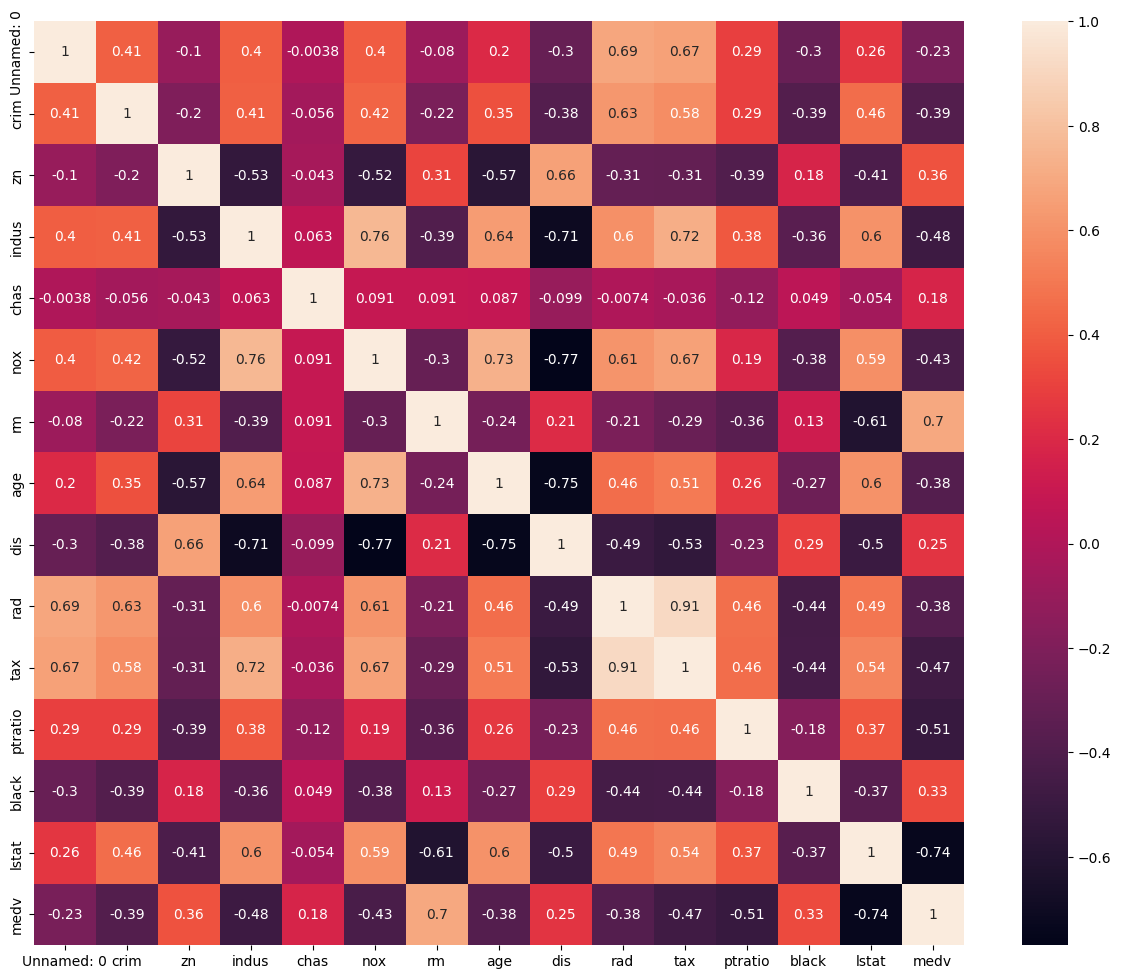

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = boston_house_price.corr()

plt.figure(figsize= (15,12))
sns.heatmap(correlation, annot=True)

In [15]:
features = boston_house_price.iloc[:,:13]
features

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45


### Let's do the hands-on with the Enbedded method also for feature selection. Here we will be using Random Forest model to check which features are providing better information.

In [17]:
from sklearn.ensemble import RandomForestRegressor

### Random forest model uses multiple Decision Trees, and hence we need to define how many DTs we want. 
## Here, we will be using 1300 estimators

rfr = RandomForestRegressor(n_estimators=1300)
rfr.fit(features, target)

RandomForestRegressor(n_estimators=1300)

#### Now, we have the RF model ready, which knows which features are important and can arrange them in a decreasing order of importance.

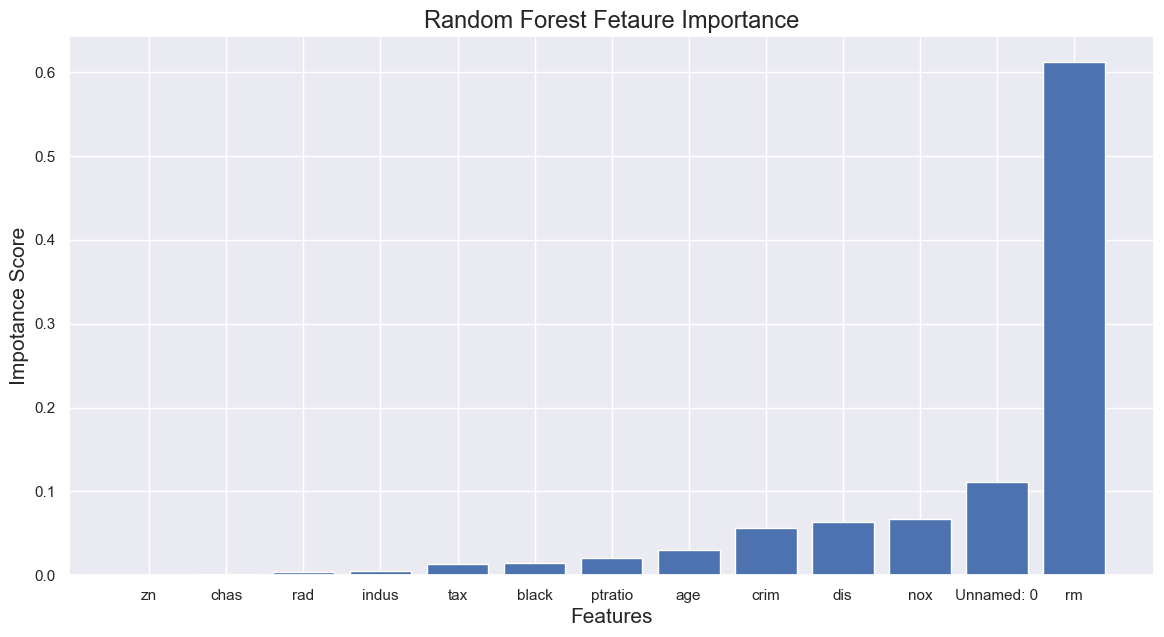

In [18]:
importance = rfr.feature_importances_

importance_df = pd.DataFrame({"Features": features.columns, "Importance":importance})
importance_df.set_index("Importance")

importance_df = importance_df.sort_values("Importance")
fig = plt.figure(figsize=(14,7))
plt.bar(importance_df["Features"], importance_df["Importance"])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Impotance Score', fontsize=15)
plt.title('Random Forest Fetaure Importance', fontsize=17)
plt.show()

### So, it is clearly evident that feature "rm" is the most important feature among all the features available.
We can remove the features which are least important from the above graph.

# Feature Quality Assessment

Let's create a dummy dataset for data imputation

In [21]:
purchase = pd.read_csv("purchase.csv")

In [22]:
purchase

,Unnamed: 0,Price,Payment Method,Quantity
0,0,102.0,Card,12.0
1,1,721.0,Cash,1.0
2,2,231.0,Card,NaN
3,3,NaN,Cash,1.0
4,4,18.0,NaN,1.0
5,5,750.0,Card,9.0
6,6,100.0,Cash,NaN
7,7,NaN,Card,5.0
8,8,605.0,Card,1.0
9,9,750.0,NaN,NaN


#### Replacing missing values with mean

In [23]:
purchase["Price"] = purchase["Price"].fillna(purchase["Price"].mean())

#### Replacing missing values with median

In [69]:
purchase["Price"] = purchase["Price"].fillna(purchase["Price"].median())

#### Replacing missing values with backward filling

In [83]:
purchase["Price"].fillna(method='bfill', inplace=True)

#### Replacing missing values with interpolation method

In [94]:
purchase["Price"]= purchase["Price"].interpolate()

,Price,Payment Method,Quantity
0,102.10,Card,12.0
1,721.00,Cash,1.0
2,231.50,Card,1.0
3,124.75,Cash,1.0
4,18.00,NaN,1.0
5,750.00,Card,9.0
6,100.00,Cash,7.0
7,352.75,Card,5.0
8,605.50,Card,1.0
9,750.00,NaN,1.0


#### Replacing missing values with mode

In [95]:
purchase['Payment Method'] = purchase['Payment Method'].fillna(purchase['Payment Method'].mode().iloc[0])

#### Replacing missing values with a new class of "Missing"

In [24]:
purchase['Payment Method'] = purchase['Payment Method'].fillna('Missing')

In [25]:
purchase

,Unnamed: 0,Price,Payment Method,Quantity
0,0,102.000,Card,12.0
1,1,721.000,Cash,1.0
2,2,231.000,Card,NaN
3,3,409.625,Cash,1.0
4,4,18.000,Missing,1.0
5,5,750.000,Card,9.0
6,6,100.000,Cash,NaN
7,7,409.625,Card,5.0
8,8,605.000,Card,1.0
9,9,750.000,Missing,NaN


# Outliers

### Finding outliers in the dummy dataset

In [48]:
temperature = pd.read_csv('temp.csv')

In [49]:
temperature.head()

,Temperature,City,Date
0,27,Delhi,10-10-2020
1,22,Delhi,11-10-2020
2,25,Delhi,12-10-2020
3,22,Delhi,13-10-2020
4,23,Delhi,14-10-2020


We will be using the famous IQR strategy for the finding the Positions of Quartiles Q1 and Q3 and based on that decide the anomaly.

In [50]:
Q1 = temperature['Temperature'].quantile(0.25)
Q3 = temperature['Temperature'].quantile(0.75)

In [51]:
IQR = Q3 - Q1

In [52]:
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [53]:
upper_limit

33.5

In [54]:
anomaly = temperature[(temperature['Temperature'] > upper_limit) | (temperature['Temperature'] < lower_limit)]

In [55]:
anomaly

,Temperature,City,Date
10,48,Delhi,20/10/2020


#### So, the temperature value of 48 is treated as an anomaly.

### Let's use the Standard deviation method also for finding the outliers on the same dataset

In [56]:
upper_bound = temperature['Temperature'].mean() + 3*temperature['Temperature'].std()
lower_bound = temperature['Temperature'].mean() - 3*temperature['Temperature'].std()

print(upper_bound, lower_bound)

49.07556278473434 5.469891760720209


In [57]:
anomaly = temperature[(temperature['Temperature'] > upper_bound) | (temperature['Temperature'] < lower_bound)]

In [58]:
anomaly

,Temperature,City,Date


#### As the upper bound is 49 and max tempreture in the data is 48, so there is no outlier.

# Data Sampling

Let's first make a dummy data and then use it for Data Sampling use-case

In [60]:
print("Without Sampling Classes")
print([0, 0 ,0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
print(' ')
print(' ')
print('After Upsampling the Minority Class')
print([0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 0 ,0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Without Sampling Classes
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 
 
After Upsampling the Minority Class
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [62]:
import pandas as pd
  
# Create a dictionary of students
students = {
    'Name': ['Joshep', 'Marry', 'Jane', 'Mike', 'John', 'Billy', 'Nikki', 'Ben', 'Bill', 'Ken'],
    'ID': ['001', '002', '003', '004', '005', '006', 
           '007', '008', '009', '010'],
    'Color': ['Black', 'Black', 'Red', 'Green', 'Green', 'Green', 'Red', 
              'Black', 'Black', 'Black'],
    
    'Rating': [2, 3, 1, 3, 2, 3, 3, 1, 2, 1]
}
  
# Create dataframe from students dictionary
df = pd.DataFrame(students)
  
# view the dataframe
df

,Name,ID,Color,Rating
0,Joshep,001,Black,2
1,Marry,002,Black,3
2,Jane,003,Red,1
3,Mike,004,Green,3
4,John,005,Green,2
5,Billy,006,Green,3
6,Nikki,007,Red,3
7,Ben,008,Black,1
8,Bill,009,Black,2
9,Ken,010,Black,1


In [63]:
df.groupby('Color', group_keys=False).apply(lambda x: x.sample(frac=0.6))

,Name,ID,Color,Rating
9,Ken,010,Black,1
0,Joshep,001,Black,2
8,Bill,009,Black,2
4,John,005,Green,2
5,Billy,006,Green,3
6,Nikki,007,Red,3


In [64]:
df.sample(n=6, random_state=1)

,Name,ID,Color,Rating
2,Jane,003,Red,1
9,Ken,010,Black,1
6,Nikki,007,Red,3
4,John,005,Green,2
0,Joshep,001,Black,2
3,Mike,004,Green,3


# Feature Reduction Techniques

## Principal Component Analysis (PCA)

The dataset is huge and can be downloaded from this link: [Creditcard.csv](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [66]:
transaction_data = pd.read_csv("creditcard.csv")

In [67]:
transaction_data.drop("Time", axis=1, inplace=True)

In [68]:
transaction_feature = transaction_data.iloc[:,:-2]

In [69]:
transaction_feature.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


### We will be using Scikit-learn library to use the existing PCA function for dimension reduction.

In [72]:
from sklearn.decomposition import PCA

pca = PCA()
transaction_feature = pca.fit_transform(transaction_feature)

#### We will use the scree plot to check how many dimensions will be sufficient to retain most of the information present in the dataset.

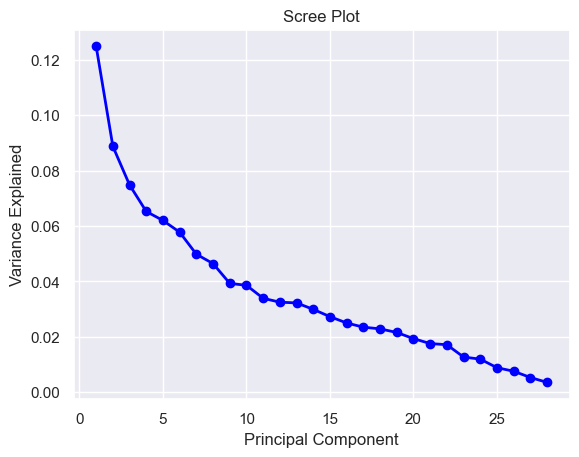

In [71]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [73]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

[12.48375707  8.87294517  7.48093391  6.52314765  6.19904486  5.77559233
  4.97985207  4.64169566  3.92749719  3.85786696  3.39014785  3.24875815
  3.22327116  2.99007578  2.72617319  2.49844761  2.34731555  2.2860303
  2.15627103  1.93390711  1.7555909   1.71367096  1.26888126  1.19357733
  0.88419944  0.75668372  0.53013145  0.35453436]


In [76]:
pca = PCA(n_components=17)
reduced_features = pca.fit_transform(transaction_feature)

In [77]:
reduced_features = pd.DataFrame(reduced_features)
reduced_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.359807,0.072781,-2.536345,1.378156,0.338320,0.462390,0.239597,-0.098695,0.363797,-0.090794,-0.551640,0.617797,-0.991417,0.311176,1.468193,-0.470272,-0.207851
1,-1.191857,-0.266151,-0.166480,0.448154,-0.060018,-0.082360,-0.078803,-0.085101,-0.255423,0.166974,1.612718,-1.065236,0.489091,0.143773,0.635560,0.463937,0.114825
2,1.358354,1.340163,-1.773213,0.379777,0.503199,1.800496,0.791463,-0.247681,-1.514670,-0.207643,0.624565,-0.066077,0.717334,0.165937,2.345844,-2.890263,-1.110191
3,0.966272,0.185227,-1.792987,-0.863287,0.010307,1.247210,0.237605,-0.377427,-1.386995,0.054953,-0.226606,-0.178242,0.507679,0.287941,-0.631374,-1.059299,0.684463
4,1.158234,-0.877736,-1.548710,0.403039,0.407191,0.095930,0.592935,0.270544,0.817776,-0.753073,-0.822991,-0.538213,1.345756,1.119691,0.175174,-0.451042,0.237422


In [78]:
reduced_features.shape

(284807, 17)

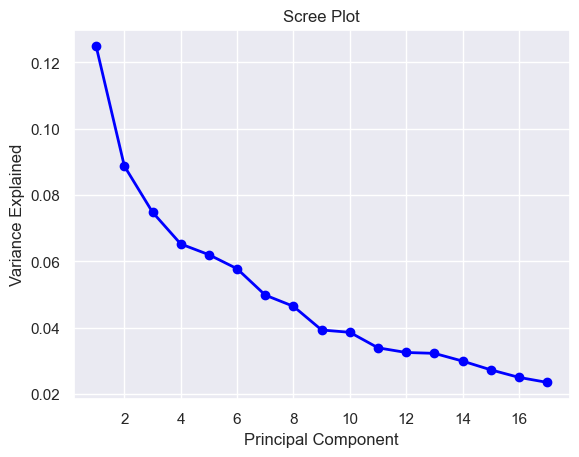

In [79]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

One can say that the 17 is also a very big number. So in that case, we can reduce it further to 3 dimensions using another feature reduction technique: the t-SNE algorithm.

In [81]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [82]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)

tsne_results = tsne.fit_transform(reduced_features)

/Users/ravishkumar/EA_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ravishkumar/EA_venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 284807 samples in 0.010s...
[t-SNE] Computed neighbors for 284807 samples in 26.232s...
[t-SNE] Computed conditional probabilities for sample 1000 / 284807
[t-SNE] Computed conditional probabilities for sample 2000 / 284807
[t-SNE] Computed conditional probabilities for sample 3000 / 284807
[t-SNE] Computed conditional probabilities for sample 4000 / 284807
[t-SNE] Computed conditional probabilities for sample 5000 / 284807
[t-SNE] Computed conditional probabilities for sample 6000 / 284807
[t-SNE] Computed conditional probabilities for sample 7000 / 284807
[t-SNE] Computed conditional probabilities for sample 8000 / 284807
[t-SNE] Computed conditional probabilities for sample 9000 / 284807
[t-SNE] Computed conditional probabilities for sample 10000 / 284807
[t-SNE] Computed conditional probabilities for sample 11000 / 284807
[t-SNE] Computed conditional probabilities for sample 12000 / 284807
[t-SNE] Computed conditional proba

[t-SNE] Computed conditional probabilities for sample 121000 / 284807
[t-SNE] Computed conditional probabilities for sample 122000 / 284807
[t-SNE] Computed conditional probabilities for sample 123000 / 284807
[t-SNE] Computed conditional probabilities for sample 124000 / 284807
[t-SNE] Computed conditional probabilities for sample 125000 / 284807
[t-SNE] Computed conditional probabilities for sample 126000 / 284807
[t-SNE] Computed conditional probabilities for sample 127000 / 284807
[t-SNE] Computed conditional probabilities for sample 128000 / 284807
[t-SNE] Computed conditional probabilities for sample 129000 / 284807
[t-SNE] Computed conditional probabilities for sample 130000 / 284807
[t-SNE] Computed conditional probabilities for sample 131000 / 284807
[t-SNE] Computed conditional probabilities for sample 132000 / 284807
[t-SNE] Computed conditional probabilities for sample 133000 / 284807
[t-SNE] Computed conditional probabilities for sample 134000 / 284807
[t-SNE] Computed con

[t-SNE] Computed conditional probabilities for sample 246000 / 284807
[t-SNE] Computed conditional probabilities for sample 247000 / 284807
[t-SNE] Computed conditional probabilities for sample 248000 / 284807
[t-SNE] Computed conditional probabilities for sample 249000 / 284807
[t-SNE] Computed conditional probabilities for sample 250000 / 284807
[t-SNE] Computed conditional probabilities for sample 251000 / 284807
[t-SNE] Computed conditional probabilities for sample 252000 / 284807
[t-SNE] Computed conditional probabilities for sample 253000 / 284807
[t-SNE] Computed conditional probabilities for sample 254000 / 284807
[t-SNE] Computed conditional probabilities for sample 255000 / 284807
[t-SNE] Computed conditional probabilities for sample 256000 / 284807
[t-SNE] Computed conditional probabilities for sample 257000 / 284807
[t-SNE] Computed conditional probabilities for sample 258000 / 284807
[t-SNE] Computed conditional probabilities for sample 259000 / 284807
[t-SNE] Computed con

### Removing features to reduce the dimensionality

We have seen the mlxtend library helps in selecting best features and via that way we can reduce dimension

In [80]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

features = boston_house_price.iloc[:,:13]
target = boston_house_price.iloc[:,-1]

# Create an EFS object
efs = EFS(lr,                  # Use linear regression as the Regressor
          min_features=6,      # The minimum number of features to consider is 3
          max_features=13,     # The maximum number of features to consider is 10
          scoring='r2')        # The metric to use to evaluate the classifier is accuracy 

# Train EFS with our dataset
efs = efs.fit(features, target)

# Print the results
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

Features: 3000/5812IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Other Additional Processing examples 

In [84]:
diabetes = pd.read_csv("diabetes.csv")

In [85]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Normalizing the dataset before feeding it to ML models

In [86]:
from sklearn.preprocessing import StandardScaler

target = diabetes["Outcome"]
features = diabetes.drop("Outcome", axis=1)

scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

### Scikit-learn library also porovides method to select the features from model: SelectFromModel

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

target = diabetes["Outcome"]
features = diabetes.drop("Outcome", axis=1)

scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

logistic = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
logistic.fit(scaled_features, target)

selected_features = features.columns[(logistic.get_support())]

print('Total number of features: {}'.format((features.shape[1])))
print('Features selected: {}'.format(len(selected_features)))
print('Number of discarded features: {}'.format(np.sum(logistic.estimator_.coef_ == 0)))

Total number of features: 8
Features selected: 7
Number of discarded features: 1


In [88]:
features.columns[(logistic.estimator_.coef_ == 0).ravel()]

Index(['SkinThickness'], dtype='object')

In [20]:
wine_quality = pd.read_csv(r'C:\Users\shash\Downloads\Loan Requirements\WineQT.csv')
wine_quality = wine_quality.dropna()

target = wine_quality["quality"]
features = wine_quality.drop("quality", axis=1)

In [21]:
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [24]:
from sklearn.feature_selection import mutual_info_classif

mutual_information = mutual_info_classif(features, target)

In [25]:
mutual_information_series = pd.Series(mutual_information)
mutual_information_series.index = features.columns
mutual_information_series.sort_values(ascending=False)

alcohol                 0.201111
volatile acidity        0.124070
sulphates               0.122825
total sulfur dioxide    0.107282
density                 0.061795
fixed acidity           0.059698
citric acid             0.049280
residual sugar          0.037183
free sulfur dioxide     0.032566
chlorides               0.013437
pH                      0.012752
dtype: float64

<AxesSubplot:>

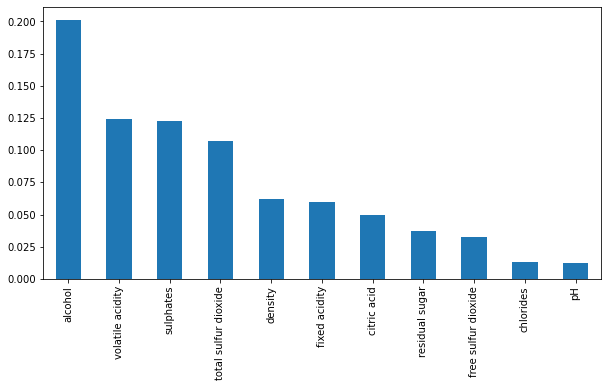

In [32]:
mutual_information_series.sort_values(ascending=False).plot.bar(figsize=(10, 5))

In [40]:
from sklearn.feature_selection import VarianceThreshold

target = wine_quality["quality"]
features = wine_quality.drop("quality", axis=1)

selector = VarianceThreshold(threshold=0.03)
selector.fit(features)
features.columns[selector.get_support()]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'alcohol'],
      dtype='object')

In [46]:
tennis_data.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [75]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder 

tennis_data = pd.read_csv(r'C:\Users\shash\Downloads\SQL\play_tennis.csv')

le = LabelEncoder()

cat_columns = tennis_data.columns

tennis_data[cat_columns] = tennis_data[cat_columns].apply(lambda x: le.fit_transform(x))

target = tennis_data["play"]
features = tennis_data.drop(["play"], axis=1)

chi2_features = SelectKBest(chi2, k = 4)
Best_k_features = chi2_features.fit_transform(features, target)

print("Total Number of Features" ,features.shape[1])
print("Reduced to {} features".format(Best_k_features.shape[1]))

Total Number of Features 5
Reduced to 4 features
